# Simple linear regression

In [1]:
library(ISLR)
library(MASS)

In [2]:
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [3]:
lm.fit  = lm(medv ~  lstat, data = Boston)

In [4]:
lm.fit


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [5]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


The degree of freedom of the residual standard error is ```number of observations - 1 - number of predictors```.

In [6]:
str(lm.fit)

List of 12
 $ coefficients : Named num [1:2] 34.55 -0.95
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "lstat"
 $ residuals    : Named num [1:506] -5.82 -4.27 3.97 1.64 6.71 ...
  ..- attr(*, "names")= chr [1:506] "1" "2" "3" "4" ...
 $ effects      : Named num [1:506] -506.86 -152.46 4.43 2.12 7.13 ...
  ..- attr(*, "names")= chr [1:506] "(Intercept)" "lstat" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:506] 29.8 25.9 30.7 31.8 29.5 ...
  ..- attr(*, "names")= chr [1:506] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:506, 1:2] -22.4944 0.0445 0.0445 0.0445 0.0445 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:506] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "lstat"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.04 1.02
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 504
 $ xlevels      

In [7]:
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

In [8]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


The confidence interval is much wider than the prediction interval.

In [9]:
predict(lm.fit, data.frame(lstat = c(5, 10, 15)), interval = 'confidence')

fit,lwr,upr
29.80359,29.00741,30.59978
25.05335,24.47413,25.63256
20.30310,19.73159,20.87461


In [10]:
predict(lm.fit, data.frame(lstat = c(5, 10, 15)), interval = 'prediction')

fit,lwr,upr
29.80359,17.565675,42.04151
25.05335,12.827626,37.27907
20.30310,8.077742,32.52846


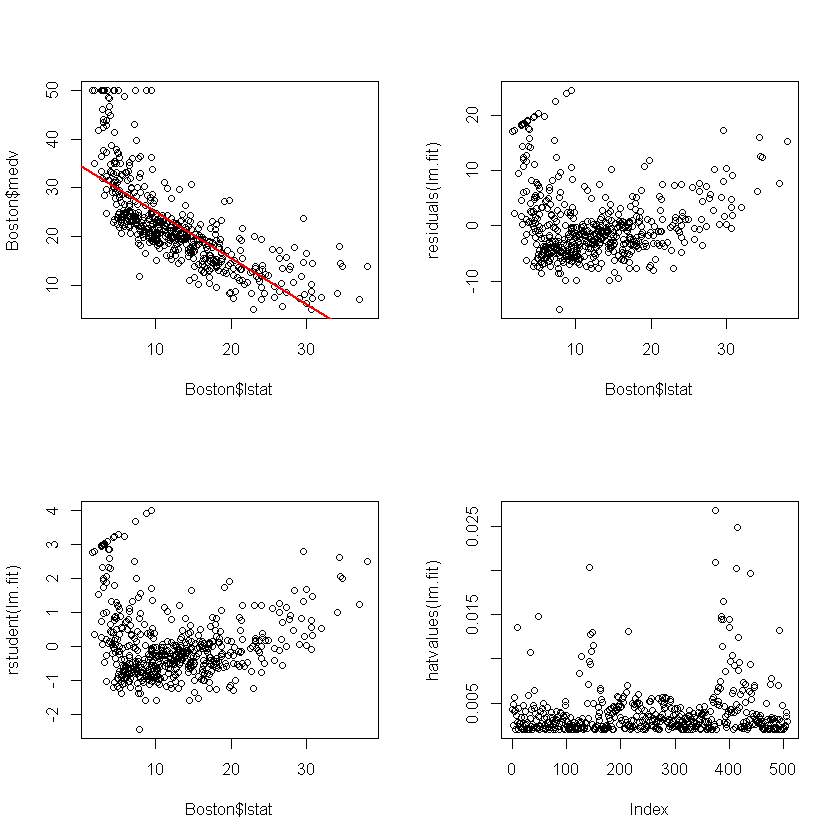

In [11]:
par(mfrow = c(2, 2))
plot(Boston$lstat, Boston$medv)
abline(lm.fit, col = 'red', lw = 2)

plot(Boston$lstat, residuals(lm.fit))

plot(Boston$lstat, rstudent(lm.fit))

#plot(Boston$lstat, hatvalues(lm.fit))
plot(hatvalues(lm.fit))

In [12]:
par(mfrow = c(2, 2))

# Multiple linear regression

In [13]:
lm.fit = lm(medv ~ lstat + age, data = Boston)

In [14]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


Do a multiple linear regression on all predictors.

In [15]:
lm.fit = lm(medv ~ ., data = Boston)

In [16]:
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

Calculate variance inflation factor (VIF) which is a statistic to detect collinearity. $$ VIF(\hat{\beta}_j) = \frac1{1 - R^2_{X_j | X_{-j}} $$

In [18]:
library(car)

ERROR: Error: package or namespace load failed for 'car' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'readxl'


In [ ]:
vif(lm.fit)

In [ ]:
install.packages('readxl')

Installing package into 'C:/Users/Dazhi/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'rematch', 'prettyunits', 'cellranger', 'progress'

